<a href="https://colab.research.google.com/github/RacheleRice/h5n1_pandy_probability/blob/main/H5N1_Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

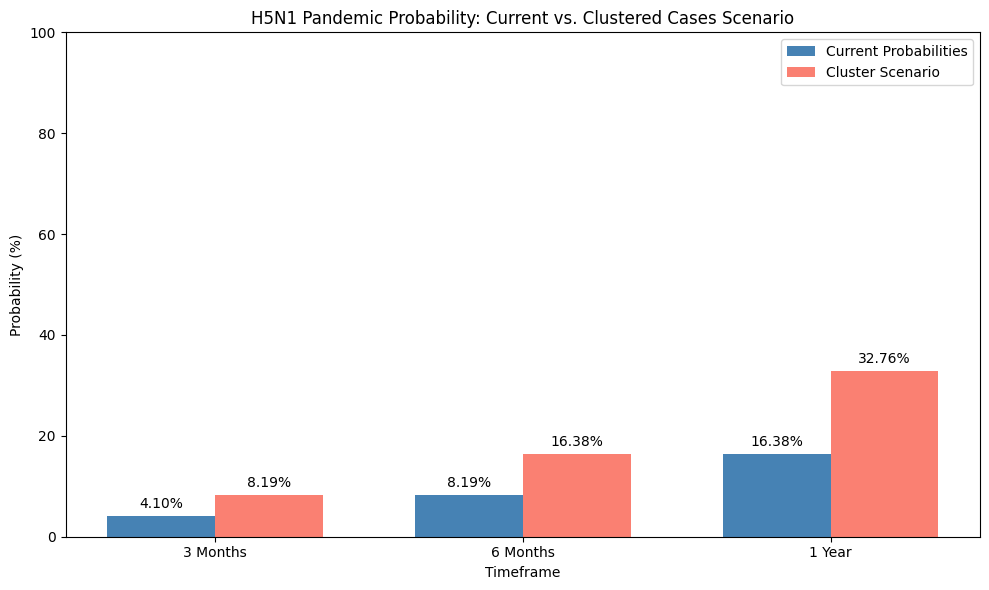

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated parameters for current scenario
prior_pandemic = 0.07  # Adjusted prior probability due to rising human cases and severe infection
likelihood_spread = 0.65  # Increased likelihood of sustained transmission due to unexplained cases and severity
new_evidence_factor = 0.9  # Evidence strength remains high given the severe case and widespread outbreaks

# Updated probabilities using Bayesian adjustment
prob_3_months = prior_pandemic * likelihood_spread * new_evidence_factor
prob_6_months = prob_3_months * 2.0  # Risk compounds further over time
prob_1_year = prob_3_months * 4.0  # Risk significantly higher over a year

# Clustered cases scenario
cluster_multiplier = 2.0  # Increased risk due to clustering
prob_3_months_cluster = prob_3_months * cluster_multiplier
prob_6_months_cluster = prob_6_months * cluster_multiplier
prob_1_year_cluster = prob_1_year * cluster_multiplier

# Ensure probabilities do not exceed 100%
prob_3_months = min(prob_3_months, 1.0)
prob_6_months = min(prob_6_months, 1.0)
prob_1_year = min(prob_1_year, 1.0)
prob_3_months_cluster = min(prob_3_months_cluster, 1.0)
prob_6_months_cluster = min(prob_6_months_cluster, 1.0)
prob_1_year_cluster = min(prob_1_year_cluster, 1.0)

# Convert to percentages
current_probabilities = [prob_3_months * 100, prob_6_months * 100, prob_1_year * 100]
cluster_probabilities = [
    prob_3_months_cluster * 100,
    prob_6_months_cluster * 100,
    prob_1_year_cluster * 100,
]

timeframes = ['3 Months', '6 Months', '1 Year']

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(timeframes))
bar_width = 0.35

# Bar chart for current probabilities
bars1 = plt.bar(index, current_probabilities, bar_width, label='Current Probabilities', color='steelblue')

# Bar chart for clustered scenario
bars2 = plt.bar(index + bar_width, cluster_probabilities, bar_width, label='Cluster Scenario', color='salmon')

# Chart details
plt.title('12.19.24 H5N1 Pandemic Probability: Current vs. Clustered Cases Scenario')
plt.ylabel('Probability (%)')
plt.xlabel('Timeframe')
plt.xticks(index + bar_width / 2, timeframes)
plt.ylim(0, 100)
plt.legend()

# Add value labels
for bars, values in zip([bars1, bars2], [current_probabilities, cluster_probabilities]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
